# Adicionar requimentos.txt

In [1]:
#https://towardsdatascience.com/generating-a-requirements-file-jupyter-notebook-385f1c315b52
#instalar pacotes
#pip install pipreqs
#pip install nbconvert

#Then, navigate to the folder where your Jupyter notebook is located.
#jupyter nbconvert --output-dir="./reqs" --to script NOMECODIGO.ipynb
# cd reqs
# pipreqs --encoding=utf8

#Virtualenv
#https://www.geeksforgeeks.org/using-jupyter-notebook-in-virtual-environment/

# Python version

In [44]:
from platform import python_version
print(python_version())

3.9.7


# Bibliotecas

In [2]:
import numpy as np
import scipy
import scipy.spatial
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", palette="pastel")

#Escolha do número de clusters
from yellowbrick.cluster import KElbowVisualizer

#Data Analysis
from pivottablejs import pivot_ui

In [3]:
df = pd.read_csv("Country-data.csv", sep=',', index_col=0)
df.head(6)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300


In [4]:
pivot_ui(df)

# Pre-processing

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [6]:
# provavel presenca de outliers, o valor de min ou max esta distante da media
# ou min e max nao é simetrico em relacao a media 

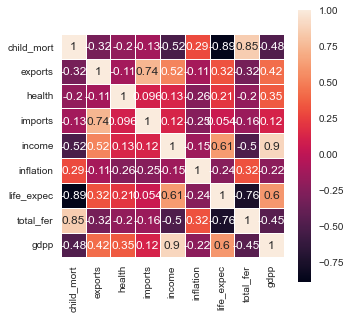

In [7]:
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df.corr(), square=True, linewidths=.5, annot=True);

<AxesSubplot:>

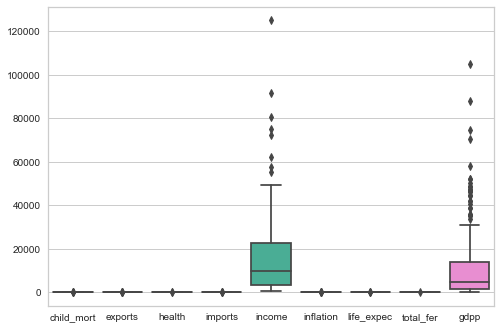

In [8]:
sns.boxplot(data=df)

In [9]:
normalized_df = (df-df.mean())/df.std()
normalized_df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,1.555642e-16,1.0,-0.884478,-0.744380,-0.470383,0.590889,4.208640
exports,167.0,-3.478588e-16,1.0,-1.495694,-0.631438,-0.222858,0.373596,5.796402
health,167.0,-1.403069e-15,1.0,-1.822346,-0.690135,-0.180458,0.649588,4.035299
imports,167.0,3.463630e-16,1.0,-1.934123,-0.689405,-0.148297,0.489880,5.250390
income,167.0,-8.243572e-17,1.0,-0.857746,-0.715305,-0.372687,0.293355,5.594716
inflation,167.0,1.329608e-17,1.0,-1.134440,-0.564942,-0.226270,0.280792,9.102343
life_expec,167.0,3.616535e-16,1.0,-4.324181,-0.590980,0.286097,0.702147,1.376822
total_fer,167.0,1.728491e-17,1.0,-1.187678,-0.761612,-0.355362,0.615674,3.000326
gdpp,167.0,2.659217e-17,1.0,-0.694711,-0.634751,-0.453068,0.059243,5.021405


<AxesSubplot:>

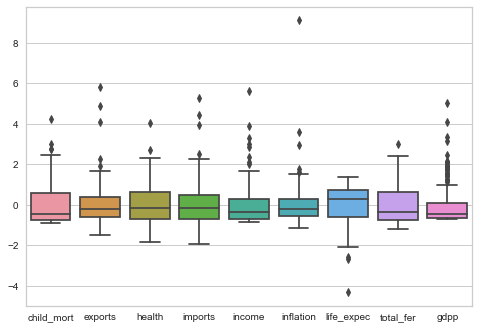

In [10]:
sns.boxplot(data=normalized_df)

C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

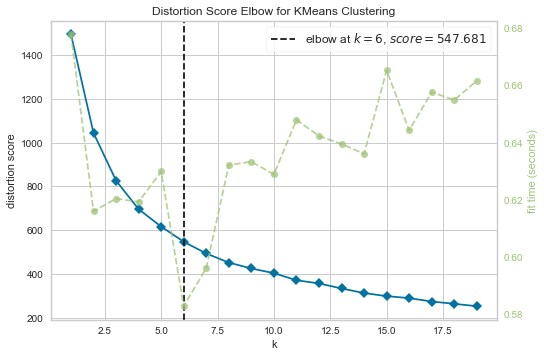

In [11]:
#Kmeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

#“elbow” the point after which the distortion start decreasing in a linear fashion
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 20))
visualizer.fit(normalized_df); 
visualizer.poof();

# Kmeans

In [12]:
MYSEED=50
kmeans = KMeans(n_clusters=3, random_state=MYSEED).fit(normalized_df)
cluster_df = df.copy()
cluster_df['cluster_kmeans'] = kmeans.labels_
cluster_df.head()


C:\Users\shtsu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [13]:
def plot_cluster_points(df, kmeans):
    pca = PCA(2) 
    pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2']) 
    pca_data['cluster'] = pd.Categorical(kmeans.labels_)
    sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_data)

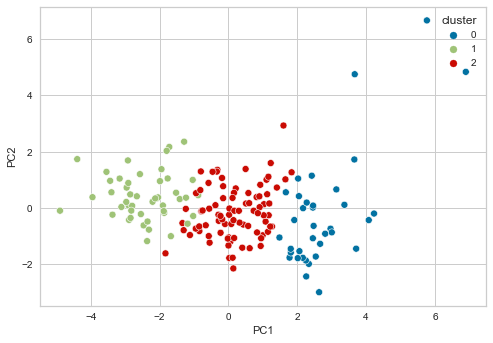

In [14]:
plot_cluster_points(normalized_df, kmeans)

In [15]:
kmeans.cluster_centers_

array([[-0.82496755,  0.64314557,  0.72523007,  0.19006732,  1.47979217,
        -0.48346661,  1.07634141, -0.78950242,  1.61114978],
       [ 1.35613914, -0.43622118, -0.15551629, -0.18863644, -0.68483442,
         0.40090504, -1.27833519,  1.36085106, -0.6024306 ],
       [-0.40523461, -0.03155768, -0.22379782,  0.02408916, -0.25101548,
        -0.01711594,  0.2539698 , -0.42307039, -0.3534185 ]])

In [16]:
#clusters means

clusters = kmeans.labels_
cluster_df = df.copy()
cluster_df['cluster'] = clusters
#cluster_df.groupby('cluster').describe().T

result_kmeans=cluster_df.groupby('cluster').agg(['mean','std']).T

#save as image
import dataframe_image as dfi
dfi.export(result_kmeans, 'dataframe.png')

result_kmeans

cluster                     0            1             2
child_mort mean      5.000000    92.961702     21.927381
           std       2.188933    33.375229     13.757919
exports    mean     58.738889    29.151277     40.243917
           std      41.930782    18.160597     19.029182
health     mean      8.807778     6.388511      6.200952
           std       3.178015     2.662015      2.167233
imports    mean     51.491667    42.323404     47.473404
           std      36.843998    17.732741     20.103873
income     mean  45672.222222  3942.404255  12305.595238
           std   20852.017526  5641.790360   8180.073696
inflation  mean      2.671250    12.019681      7.600905
           std       4.077719    15.509958      7.849516
life_expec mean     80.127778    59.187234     72.814286
           std       1.815742     6.443521      3.960745
total_fer  mean      1.752778     5.008085      2.307500
           std       0.373054     1.041382      0.696957
gdpp       mean  42494.444444  1922.382979   6486.452381
           std   18991.079777  2956.103925   5021.434052

C:\Users\shtsu\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


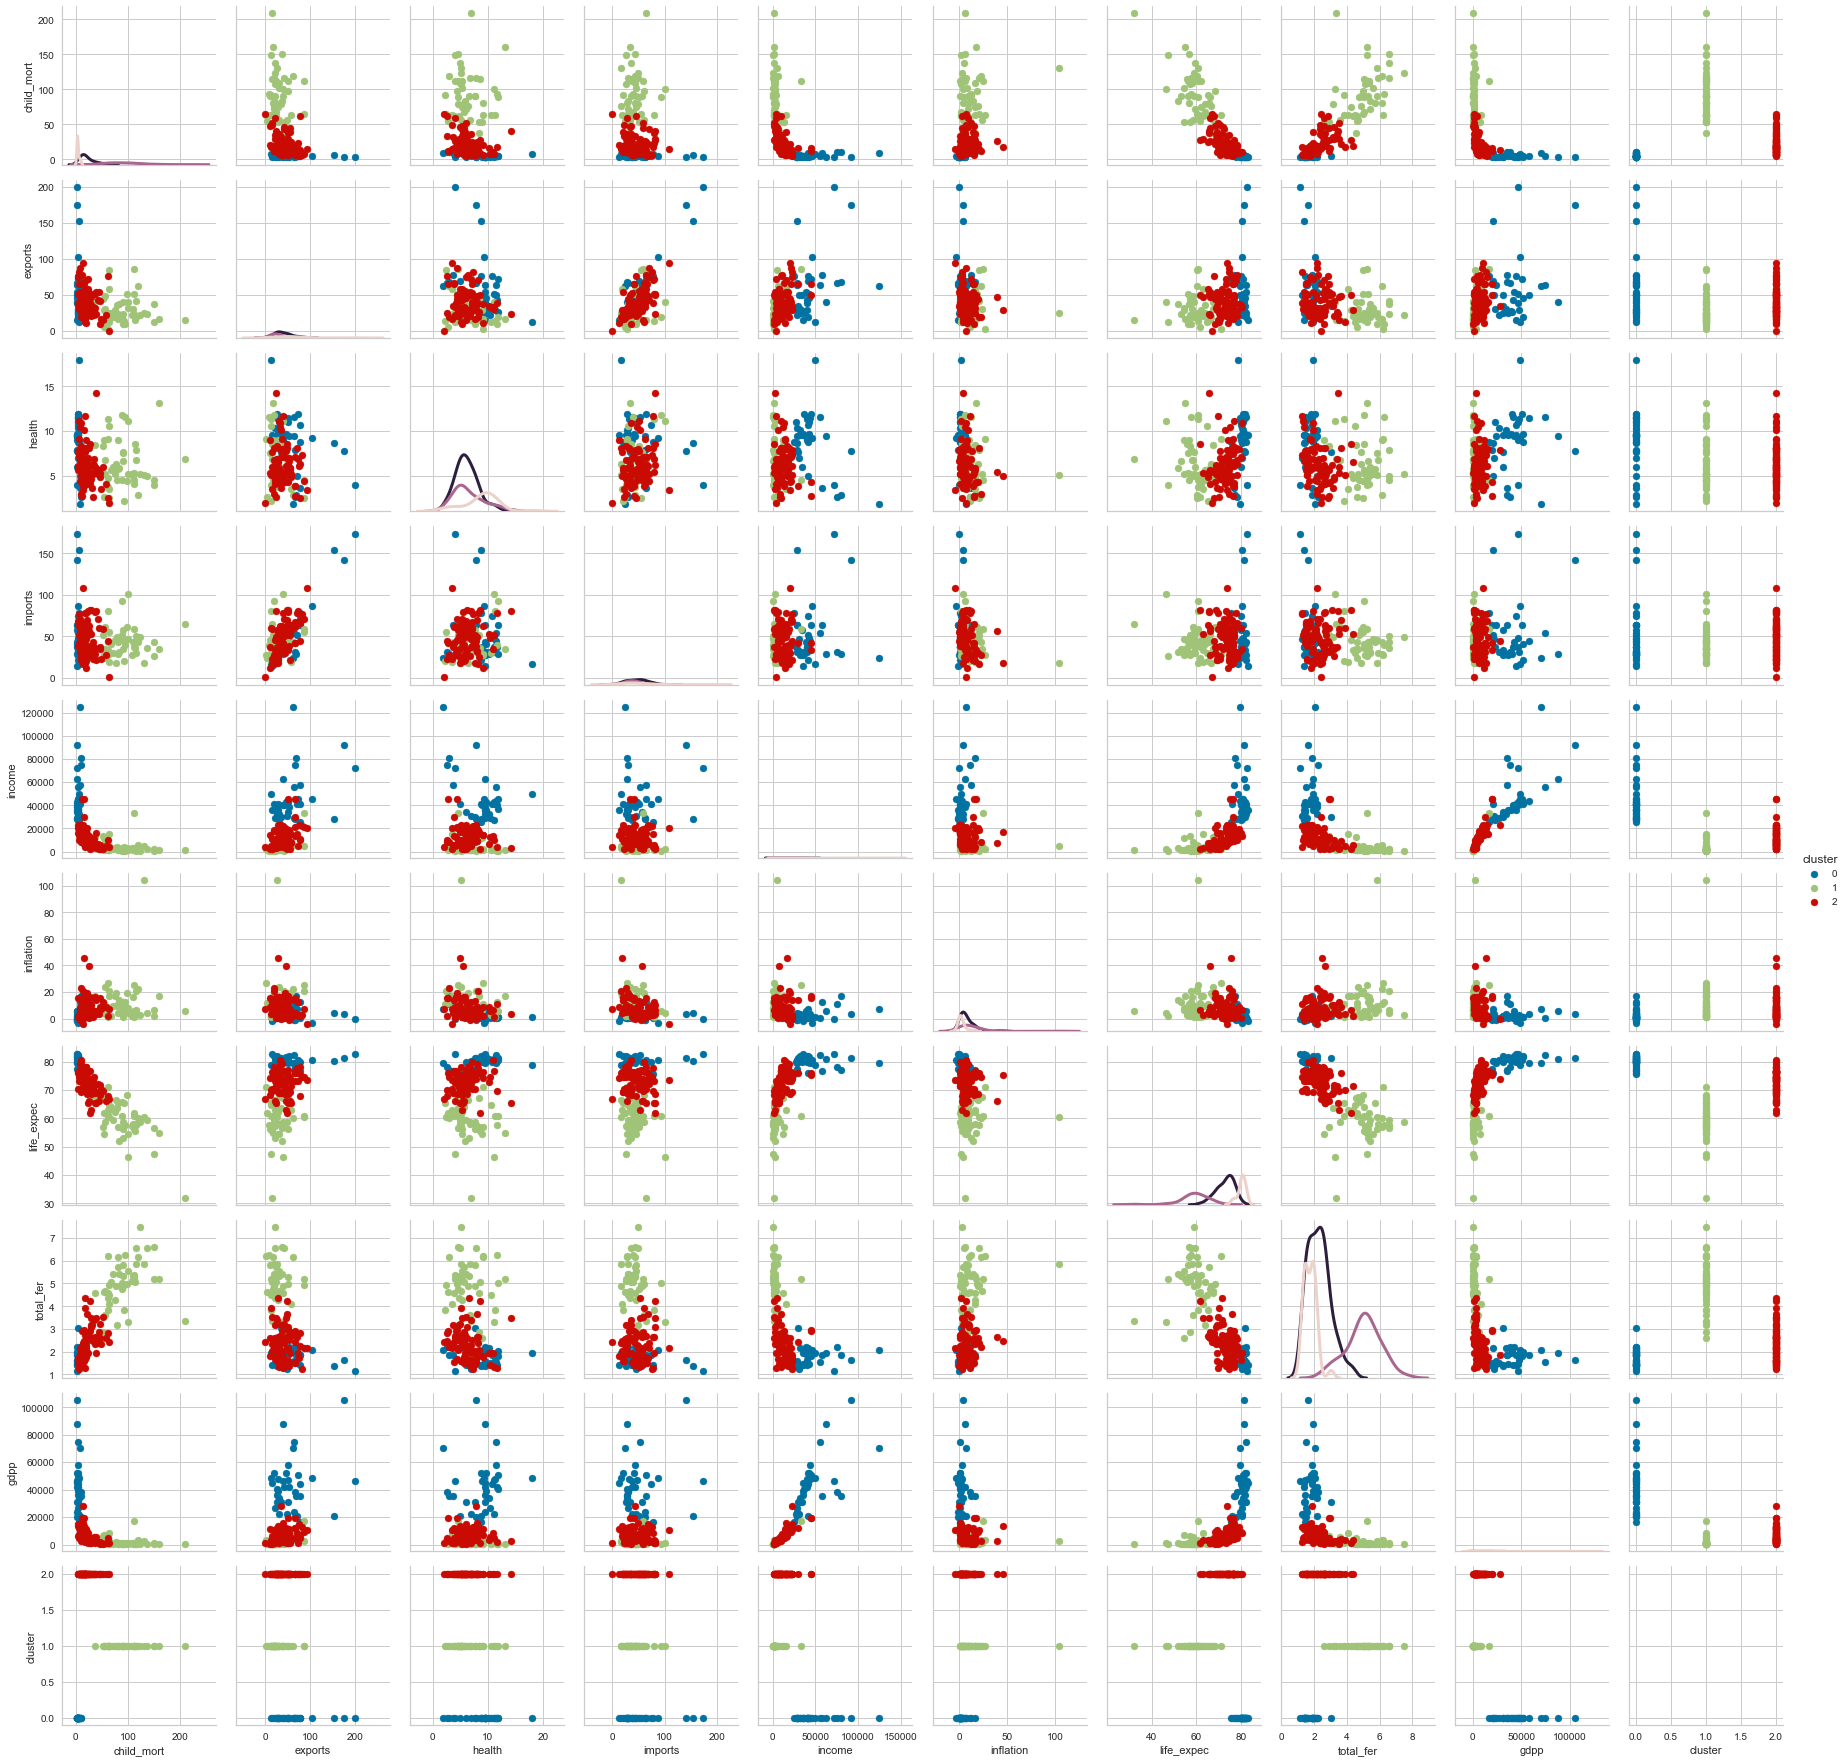

In [17]:
g = sns.PairGrid(cluster_df, vars=cluster_df, hue='cluster')
g.map_diag(sns.kdeplot, lw=3)
g.map_offdiag(plt.scatter)
#g.map(plt.scatter) todas as celulas serao scatter.
g.add_legend()

In [18]:
#find closest data from centroids
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_,normalized_df )
df.iloc[ closest, :]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Iceland,2.6,53.4,9.40,43.3,38800,5.47,82.0,2.20,41900
Guinea,109.0,30.3,4.93,43.2,1190,16.10,58.0,5.34,648
Jamaica,18.1,31.3,4.81,49.6,8000,9.81,74.7,2.17,4680


In [19]:
dfi.export(df.iloc[ closest, :], 'kmeans.png')

In [20]:
#medoid
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3).fit(normalized_df)
kmedoids.cluster_centers_

array([[-0.69354825,  0.16018613, -0.28603389,  0.49607554,  0.10142673,
        -0.59994418,  0.70214671, -0.5403213 , -0.04169175],
       [ 0.83389118, -0.81748752, -0.29331499, -0.73484168, -0.78092311,
         0.13889025, -1.26565513,  1.63955475, -0.66901376],
       [-0.09596237, -0.67156608, -0.21686344, -0.5613567 , -0.31355262,
        -0.22153987,  0.45476591, -0.2298541 , -0.40996654]])

In [21]:
#find closest data from medoids
closest, _ = pairwise_distances_argmin_min(kmedoids.cluster_centers_,normalized_df )
df.iloc[ closest, :]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
Tanzania,71.9,18.7,6.01,29.1,2090,9.25,59.3,5.43,702
Dominican Republic,34.4,22.7,6.22,33.3,11100,5.44,74.6,2.60,5450


In [22]:
dfi.export(df.iloc[ closest, :], 'kmedoide.png')

# Clusterização Hierárquica

Text(0, 0.5, 'Euclidean Distance')

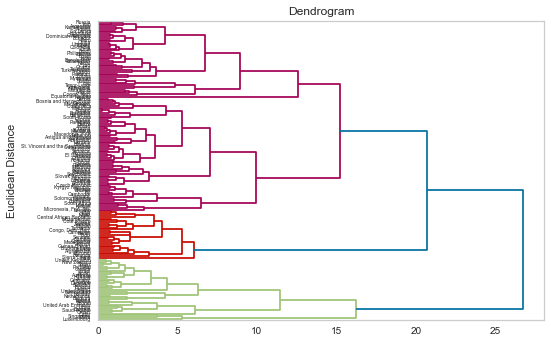

In [23]:
import scipy.cluster.hierarchy as sch

plt.figure()
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(normalized_df, method='ward'), labels=df.index, orientation='right')
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

Text(0, 0.5, 'Euclidean Distance')

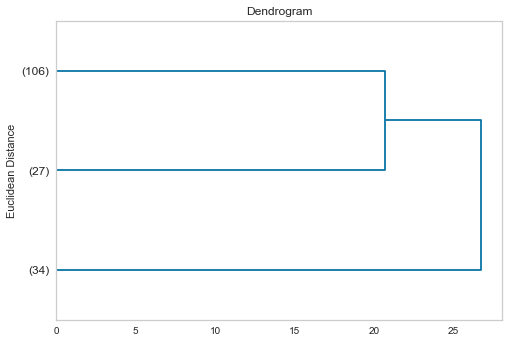

In [24]:
plt.figure()
plt.grid(False)
cut_dendrogram = sch.dendrogram(sch.linkage(normalized_df, method='ward'),truncate_mode='lastp', p=3 , labels=df.index, orientation='right')
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

In [25]:
cluster_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2


In [26]:
dendogram=sch.fcluster(sch.linkage(normalized_df,method='ward'),20, criterion='distance')-1
cluster_df['cluster_dendogram'] = dendogram

#atualizar label do dendogram para comparar com kmeans
#cluster_df['cluster_dendogram'] = cluster_df['cluster_dendogram'].replace([0,2], [2,0])
dendogram=cluster_df['cluster_dendogram']

cluster_df


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_dendogram
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,2
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,2
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,2
...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2,2
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2,2
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2,2


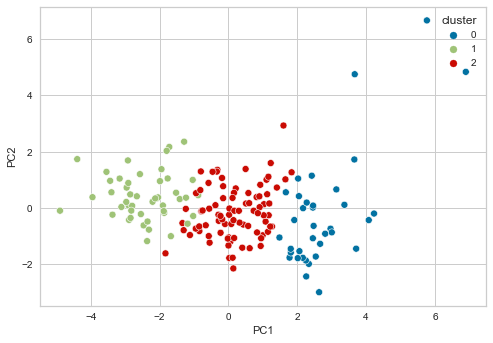

In [27]:
plot_cluster_points(normalized_df, kmeans)


In [28]:
def plot_cluster_points_dendogram(df, dendogram):
    pca = PCA(2) 
    pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2']) 
    pca_data['cluster'] = pd.Categorical(dendogram)
    sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_data)

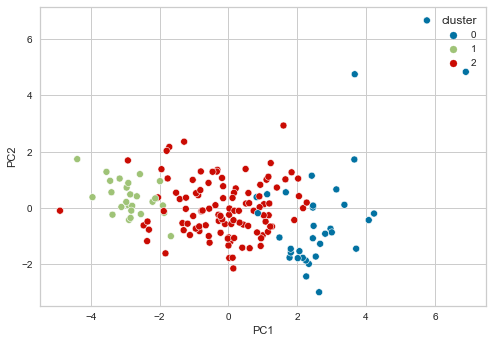

In [29]:
plot_cluster_points_dendogram(normalized_df,dendogram)

In [30]:
confusion = pd.crosstab(cluster_df['cluster'], cluster_df['cluster_dendogram'], rownames=['Kmeans'], colnames=['Dendogram'])
print (confusion)


Dendogram   0   1   2
Kmeans               
0          31   0   5
1           0  27  20
2           3   0  81


[[31  0  5]
 [ 0 27 20]
 [ 3  0 81]]


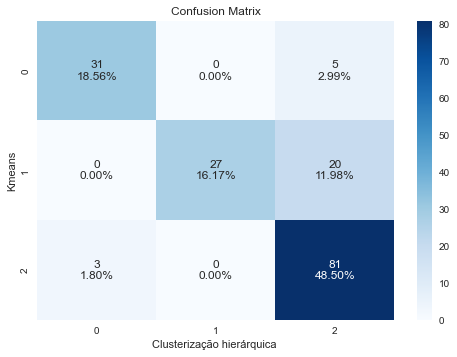

In [31]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(cluster_df['cluster'],cluster_df['cluster_dendogram'])
ax= plt.subplot()

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
_ = sns.heatmap(cf_matrix, annot=labels,fmt='', cmap='Blues') #axis 0 precision


ax.set_xlabel('Clusterização hierárquica ');ax.set_ylabel('Kmeans'); 
ax.set_title('Confusion Matrix'); 


print(cf_matrix)

In [32]:
import session_info
session_info.show()

In [33]:

pivot_ui(cluster_df)

In [34]:
#show all table
pd.set_option('display.max_rows', None)
cluster_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_dendogram
country,,,,,,,,,,,
Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,1,1
Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090,2,2
Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460,2,2
Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,1,2
Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200,2,2
Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300,2,2
Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220,2,2
Australia,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900,0,0
Austria,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900,0,0


# Comparação entre dendograma e kmeans

In [35]:
#countries that are on different groups
cluster_df.loc[cluster_df.cluster!=cluster_df.cluster_dendogram, ['difference']] = 1
cluster_df.loc[cluster_df.cluster==cluster_df.cluster_dendogram, ['difference']] = 0
diff_country=cluster_df[cluster_df['difference']==1]

In [36]:
cluster_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_dendogram,difference
country,,,,,,,,,,,,
Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,1,1,0.0
Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090,2,2,0.0
Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460,2,2,0.0
Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,1,2,1.0
Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200,2,2,0.0
Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300,2,2,0.0
Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220,2,2,0.0
Australia,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900,0,0,0.0
Austria,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900,0,0,0.0


In [37]:
#diferentes
df1 = cluster_df[cluster_df['difference']==1]
df1 = df1.iloc[:, 0:9]
df1["cluster_dendogram"] = cluster_df.iloc[:, 10]

diferentes=df1.groupby('cluster_dendogram').agg(['mean','std']).T

In [38]:
dfi.export(df1, 'diferentes_tabela.png')
df1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_dendogram
country,,,,,,,,,,
Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2
Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,2
"Congo, Rep.",63.9,85.10,2.46,54.7,5190,20.700,60.4,4.95,2740,2
Cyprus,3.6,50.20,5.97,57.5,33900,2.010,79.9,1.42,30800,2
Czech Republic,3.4,66.00,7.88,62.9,28300,-1.430,77.5,1.51,19800,2
Equatorial Guinea,111.0,85.80,4.48,58.9,33700,24.900,60.9,5.21,17100,2
Eritrea,55.2,4.79,2.66,23.3,1420,11.600,61.7,4.61,482,2
Gabon,63.7,57.70,3.50,18.9,15400,16.600,62.9,4.08,8750,2
Ghana,74.7,29.50,5.22,45.9,3060,16.600,62.2,4.27,1310,2


In [39]:

dfi.export(diferentes, 'diferentes.png')
diferentes

cluster_dendogram             0             2
child_mort mean       14.666667     62.144000
           std         2.608320     36.998210
exports    mean       60.300000     41.575600
           std         9.266607     23.590112
health     mean        3.646667      6.542000
           std         0.786405      2.872426
imports    mean       38.766667     49.024000
           std         5.014313     23.387822
income     mean    40100.000000  11554.800000
           std      9093.404203  11384.535242
inflation  mean       15.666667     15.012320
           std         1.501111     20.510752
life_expec mean       75.766667     65.144000
           std         0.577350      8.390524
total_fer  mean        2.756667      3.833200
           std         0.301717      1.532788
gdpp       mean    16900.000000   7400.760000
           std      4156.921938   8765.789893

In [40]:
#iguais
df0=cluster_df[cluster_df['difference']==0]
df0 = df0.iloc[:, 0:10]
df0.describe()

iguais=df0.groupby('cluster').agg(['mean','std']).T

In [41]:
dfi.export(iguais, 'iguais.png')
iguais

cluster                     0            1             2
child_mort mean      5.119355   105.070370     22.196296
           std       2.270744    33.987914     13.934063
exports    mean     58.335484    23.589630     39.501099
           std      45.084902    10.359610     18.918224
health     mean      8.970968     6.507037      6.295556
           std       3.365828     2.358064      2.145658
imports    mean     49.883871    39.662963     47.795875
           std      39.334100     9.555753     20.389833
income     mean  48312.903226  1589.740741  11276.172840
           std   21308.272915   650.612114   6108.422376
inflation  mean      2.997645     7.142778      7.302173
           std       4.254454     5.423793      7.831932
life_expec mean     80.390323    57.248148     72.704938
           std       1.678165     6.540076      3.991049
total_fer  mean      1.804516     5.433704      2.290864
           std       0.374494     0.834530      0.702740
gdpp       mean  45712.903226   667.888889   6100.765432
           std   18438.343055   304.547121   4638.013266

In [42]:
diferentes=df1.groupby('cluster_dendogram').agg(['mean','std']).T